# GETTING STARTED WITH SQL AND BIG QUERY

# Introduction

Structured Query Language, or SQL, is the programming language used with databases, and it is an important skill for any data scientist. In this course, you'll build your SQL skills using BigQuery, a web service that lets you apply SQL to huge datasets.

In this lesson, you'll learn the basics of accessing and examining BigQuery datasets. After you have a handle on these basics, we'll come back to build your SQL skills.

## YOUR FIRST BIG QUERY COMMANDS

In this we will import the bigquery python package

In [1]:
from google.cloud import bigquery

The first step in the workflow is to create a Client object. As you'll soon see, this Client object will play a central role in retrieving information from BigQuery datasets.

In [2]:
# create a client object
client = bigquery.Client()



Using Kaggle's public dataset BigQuery integration.

We'll work with a dataset of posts on Hacker News, a website focusing on computer science and cybersecurity news.

In BigQuery, each dataset is contained in a corresponding project. In this case, our hacker_news dataset is contained in the bigquery-public-data project. To access the dataset,

    We begin by constructing a reference to the dataset with the dataset() method.
    Next, we use the get_dataset() method, along with the reference we just constructed, to fetch the dataset.



In [3]:
# Construct a reference to the "hacker_news" dataset
dataset_ref = client.dataset("hacker_news", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

In [4]:
 #List all the tables in the "hacker_news" dataset
tables = list(client.list_tables(dataset))

# Print names of all tables in the dataset (there are four!)
for table in tables:  
    print(table.table_id)

full


Similar to how we fetched a dataset, we can fetch a table. In the code cell below, we fetch the full table in the hacker_news dataset.

In [5]:
# Construct a reference to the "full" table
table_ref = dataset_ref.table("full")

# API request - fetch the table
table = client.get_table(table_ref)

In the next section, you'll explore the contents of this table in more detail. For now, take the time to use the image below to consolidate what you've learned so far.

#  Table schema

The structure of a table is called its schema. We need to understand a table's schema to effectively pull out the data we want.

In this example, we'll investigate the full table that we fetched above.


In [6]:
# Print all information on the columns in the full 
table.schema

[SchemaField('title', 'STRING', 'NULLABLE', None, 'Story title', (), None),
 SchemaField('url', 'STRING', 'NULLABLE', None, 'Story url', (), None),
 SchemaField('text', 'STRING', 'NULLABLE', None, 'Story or comment text', (), None),
 SchemaField('dead', 'BOOLEAN', 'NULLABLE', None, 'Is dead?', (), None),
 SchemaField('by', 'STRING', 'NULLABLE', None, "The username of the item's author.", (), None),
 SchemaField('score', 'INTEGER', 'NULLABLE', None, 'Story score', (), None),
 SchemaField('time', 'INTEGER', 'NULLABLE', None, 'Unix time', (), None),
 SchemaField('timestamp', 'TIMESTAMP', 'NULLABLE', None, 'Timestamp for the unix time', (), None),
 SchemaField('type', 'STRING', 'NULLABLE', None, 'Type of details (comment, comment_ranking, poll, story, job, pollopt)', (), None),
 SchemaField('id', 'INTEGER', 'NULLABLE', None, "The item's unique id.", (), None),
 SchemaField('parent', 'INTEGER', 'NULLABLE', None, 'Parent comment ID', (), None),
 SchemaField('descendants', 'INTEGER', 'NULLABL

Each SchemaField tells us about a specific column (which we also refer to as a field). In order, the information is:

    The name of the column
    The field type (or datatype) in the column
    The mode of the column ('NULLABLE' means that a column allows NULL values, and is the default)
    A description of the data in that column



In [7]:
# Preview the first five lines of the "full" table
client.list_rows(table, max_results=5).to_dataframe()


,title,url,text,dead,by,score,time,timestamp,type,id,parent,descendants,ranking,deleted
0,None,None,"I would rather just have wired earbuds, period...",<NA>,zeveb,<NA>,1591717736,2020-06-09 15:48:56+00:00,comment,23467666,23456782,<NA>,<NA>,<NA>
1,None,None,DNS?,<NA>,nly,<NA>,1572810465,2019-11-03 19:47:45+00:00,comment,21436112,21435130,<NA>,<NA>,<NA>
2,None,None,These benchmarks seem pretty good. Filterable...,<NA>,mrkeen,<NA>,1591717727,2020-06-09 15:48:47+00:00,comment,23467665,23467426,<NA>,<NA>,<NA>
3,None,None,Oh really?<p>* Excel alone uses 86.1MB of priv...,<NA>,oceanswave,<NA>,1462987532,2016-05-11 17:25:32+00:00,comment,11677248,11676886,<NA>,<NA>,<NA>
4,None,None,These systems are useless. Of the many flaws:...,<NA>,nyxxie,<NA>,1572810473,2019-11-03 19:47:53+00:00,comment,21436113,21435025,<NA>,<NA>,<NA>


# The list_rows() method will also let us look at just the information in a specific column. If we want to see the first five entries in the by column, for example, we can do that!

# Preview the first five entries in the "by" column of the "full" table
client.list_rows(table, selected_fields=table.schema[:1], max_results=5).to_dataframe()


# SELECT FROM AND WHERE IN SQL

## Introduction

Now that you know how to access and examine a dataset, you're ready to write your first SQL query! As you'll soon see, SQL queries will help you sort through a massive dataset, to retrieve only the information that you need.

We'll begin by using the keywords SELECT, FROM, and WHERE to get data from specific columns based on conditions you specify.

For clarity, we'll work with a small imaginary dataset pet_records which contains just one table, called pet

SELECT ... FROM

The most basic SQL query selects a single column from a single table. To do this,

    specify the column you want after the word SELECT, and then
    specify the table after the word FROM.


WHERE ...

BigQuery datasets are large, so you'll usually want to return only the rows meeting specific conditions. You can do this using the WHERE clause.

Example: What are all the U.S. cities in the OpenAQ dataset?

Now that you've got the basics down, let's work through an example with a real dataset. We'll use an OpenAQ dataset about air quality.

In [11]:
from google.cloud import bigquery

client = bigquery.Client()

dataset_ref = client.dataset("openaq",project="bigquery-public-data")

dataset = client.get_dataset(dataset_ref)

tables = list(client.list_tables(dataset))

for table in tables:
    print(table.table_id)

global_air_quality




Using Kaggle's public dataset BigQuery integration.
global_air_quality

The dataset contains only one table, called global_air_quality. We'll fetch the table and take a peek at the first few rows to see what sort of data it contains

In [14]:
# Construct a reference to the global_air_quality table
table_ref = dataset_ref.table("global_air_quality")

table = client.get_table(table_ref)
client.list_rows(table,max_results=5).to_dataframe()

,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours,location_geom
0,"Borówiec, ul. Drapałka",Borówiec,PL,bc,0.85217,2022-04-28 07:00:00+00:00,µg/m³,GIOS,1.0,52.276794,17.074114,POINT(52.276794 1)
1,"Kraków, ul. Bulwarowa",Kraków,PL,bc,0.91284,2022-04-27 23:00:00+00:00,µg/m³,GIOS,1.0,50.069308,20.053492,POINT(50.069308 1)
2,"Płock, ul. Reja",Płock,PL,bc,1.41000,2022-03-30 04:00:00+00:00,µg/m³,GIOS,1.0,52.550938,19.709791,POINT(52.550938 1)
3,"Elbląg, ul. Bażyńskiego",Elbląg,PL,bc,0.33607,2022-05-03 13:00:00+00:00,µg/m³,GIOS,1.0,54.167847,19.410942,POINT(54.167847 1)
4,"Piastów, ul. Pułaskiego",Piastów,PL,bc,0.51000,2022-05-11 05:00:00+00:00,µg/m³,GIOS,1.0,52.191728,20.837489,POINT(52.191728 1)


Everything looks good! So, let's put together a query. Say we want to select all the values from the city column that are in rows where the country column is 'US' (for "United States").

In [19]:
query = """
        SELECT city
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE country = 'US'
        """



Take the time now to ensure that this query lines up with what you learned above.
Submitting the query to the dataset

We're ready to use this query to get information from the OpenAQ dataset. As in the previous tutorial, the first step is to create a Client object.


In [16]:
# create a client object
client = bigquery.Client()





Using Kaggle's public dataset BigQuery integration.

We begin by setting up the query with the query() method. We run the method with the default parameters, but this method also allows us to specify more complicated settings that you can read about in the documentation. We'll revisit this later.


In [20]:
#set up the query
query_job = client.query(query)

In [21]:
# Next we will run the query and convert the results to a pandas DataFrame

us_cities = query_job.to_dataframe()

In [22]:
us_cities.city.value_counts().head()

city
Phoenix-Mesa-Scottsdale                     39414
Los Angeles-Long Beach-Santa Ana            27479
Riverside-San Bernardino-Ontario            26887
New York-Northern New Jersey-Long Island    25417
San Francisco-Oakland-Fremont               22710
Name: count, dtype: int64

In [23]:
# Want to run multiple queries? 

query = """

SELECT city, country FROM `bigquery-public-data.openaq.global_air_quality` WHERE country='US';
"""

You can select all columns with *

In [24]:
# Want to run multiple queries? 

query = """

SELECT * FROM `bigquery-public-data.openaq.global_air_quality` WHERE country='US';
"""

Question: What's up with the triple quotation marks (""")?

Answer: These tell Python that everything inside them is a single string, even though we have line breaks in it. The line breaks aren't necessary, but they make it easier to read your query.
Question: Do you need to capitalize SELECT and FROM?

Answer: No, SQL doesn't care about capitalization. However, it's customary to capitalize your SQL commands, and it makes your queries a bit easier to read.

# Group By, Having & Count

Introduction

Now that you can select raw data, you're ready to learn how to group your data and count things within those groups. This can help you answer questions like:

    How many of each kind of fruit has our store sold?
    How many species of animal has the vet office treated?

To do this, you'll learn about three new techniques: GROUP BY, HAVING and COUNT(). Once again, we'll use this made-up table of information on pets.

COUNT()

COUNT(), as you may have guessed from the name, returns a count of things. If you pass it the name of a column, it will return the number of entries in that column.

COUNT() is an example of an aggregate function, which takes many values and returns one. (Other examples of aggregate functions include SUM(), AVG(), MIN(), and MAX().) As you'll notice in the picture above, aggregate functions introduce strange column names (like f0__). Later in this tutorial, you'll learn how to change the name to something more descriptive.

GROUP BY

GROUP BY takes the name of one or more columns, and treats all rows with the same value in that column as a single group when you apply aggregate functions like COUNT().

For example, say we want to know how many of each type of animal we have in the pets table. We can use GROUP BY to group together rows that have the same value in the Animal column, while using COUNT() to find out how many ID's we have in each group.

GROUP BY ... HAVING

HAVING is used in combination with GROUP BY to ignore groups that don't meet certain criteria.

So this query, for example, will only include groups that have more than one ID in them.

Example: Which Hacker News comments generated the most discussion?

Ready to see an example on a real dataset? The Hacker News dataset contains information on stories and comments from the Hacker News social networking site.

We'll work with the comments table and begin by printing the first few rows

In [39]:
from google.cloud import bigquery

# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "hacker_news" dataset
dataset_ref = client.dataset("hacker_news", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "comments" table
table_ref = dataset_ref.table("full")

# API request - fetch the table
table = client.get_table(table_ref)

client.list_rows(table, max_results=5).to_dataframe()


,title,url,text,dead,by,score,time,timestamp,type,id,parent,descendants,ranking,deleted
0,None,None,"I would rather just have wired earbuds, period...",<NA>,zeveb,<NA>,1591717736,2020-06-09 15:48:56+00:00,comment,23467666,23456782,<NA>,<NA>,<NA>
1,None,None,DNS?,<NA>,nly,<NA>,1572810465,2019-11-03 19:47:45+00:00,comment,21436112,21435130,<NA>,<NA>,<NA>
2,None,None,These benchmarks seem pretty good. Filterable...,<NA>,mrkeen,<NA>,1591717727,2020-06-09 15:48:47+00:00,comment,23467665,23467426,<NA>,<NA>,<NA>
3,None,None,Oh really?<p>* Excel alone uses 86.1MB of priv...,<NA>,oceanswave,<NA>,1462987532,2016-05-11 17:25:32+00:00,comment,11677248,11676886,<NA>,<NA>,<NA>
4,None,None,These systems are useless. Of the many flaws:...,<NA>,nyxxie,<NA>,1572810473,2019-11-03 19:47:53+00:00,comment,21436113,21435025,<NA>,<NA>,<NA>


# There is an issue with this DataSet



Let's use the table to see which comments generated the most replies. Since:

    the parent column indicates the comment that was replied to, and
    the id column has the unique ID used to identify each comment,

we can GROUP BY the parent column and COUNT() the id column in order to figure out the number of comments that were made as responses to a specific comment. (This might not make sense immediately -- take your time here to ensure that everything is clear!)

Furthermore, since we're only interested in popular comments, we'll look at comments with more than ten replies. So, we'll only return groups HAVING more than ten ID's.


In [41]:
# Query to select comments that received more than 10 replies
query_popular = """
                SELECT parent, COUNT(id)
                FROM `bigquery-public-data.hacker_news.full`
                GROUP BY parent
                HAVING COUNT(id) > 10
                """


In [42]:
# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 10 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query_popular, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
popular_comments = query_job.to_dataframe()

# Print the first five rows of the DataFrame
popular_comments.head()




,parent,f0_
0,19503094,176
1,32448825,126
2,16428624,53
3,25783152,661
4,12986759,98


liasing and other improvements

A couple hints to make your queries even better:

    The column resulting from COUNT(id) was called f0__. That's not a very descriptive name. You can change the name by adding AS NumPosts after you specify the aggregation. This is called aliasing, and it will be covered in more detail in an upcoming lesson.
    If you are ever unsure what to put inside the COUNT() function, you can do COUNT(1) to count the rows in each group. Most people find it especially readable, because we know it's not focusing on other columns. It also scans less data than if supplied column names (making it faster and using less of your data access quota).

Using these tricks, we can rewrite our query:

In [44]:
# Improved version of earlier query, now with aliasing & improved readability
query_improved = """
                 SELECT parent, COUNT(1) AS NumPosts
                 FROM `bigquery-public-data.hacker_news.full`
                 GROUP BY parent
                 HAVING COUNT(1) > 10
                 """

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query_improved, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
improved_df = query_job.to_dataframe()

# Print the first five rows of the DataFrame
improved_df.head()

,parent,NumPosts
0,13529792,67
1,31743110,81
2,32875846,68
3,29082014,57
4,22326931,46


Note on using GROUP BY

Note that because it tells SQL how to apply aggregate functions (like COUNT()), it doesn't make sense to use GROUP BY without an aggregate function. Similarly, if you have any GROUP BY clause, then all variables must be passed to either a

    GROUP BY command, or
    an aggregation function.

Consider the query below:

In [45]:
query_good = """
             SELECT parent, COUNT(id)
             FROM `bigquery-public-data.hacker_news.full`
             GROUP BY parent
             """



Note that there are two variables: parent and id.

    parent was passed to a GROUP BY command (in GROUP BY parent), and
    id was passed to an aggregate function (in COUNT(id)).

And this query won't work, because the author column isn't passed to an aggregate function or a GROUP BY clause:


If you make this error, you'll get the error message SELECT list expression references column (column's name) which is neither grouped nor aggregated at.

# ORDER BY 

Introduction

So far, you've learned how to use several SQL clauses. For instance, you know how to use SELECT to pull specific columns from a table, along with WHERE to pull rows that meet specified criteria. You also know how to use aggregate functions like COUNT(), along with GROUP BY to treat multiple rows as a single group.

Now you'll learn how to change the order of your results using the ORDER BY clause, and you'll explore a popular use case by applying ordering to dates. To illustrate what you'll learn in this tutorial, we'll work with a slightly modified version of our familiar pets table.

ORDER BY

ORDER BY is usually the last clause in your query, and it sorts the results returned by the rest of your query.

Notice that the rows are not ordered by the ID column. We can quickly remedy this with the query below.



In [46]:
# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 10 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query_popular, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
popular_comments = query_job.to_dataframe()

# Print the first five rows of the DataFrame
popular_comments.head()


,parent,f0_
0,19503094,176
1,32448825,126
2,16428624,53
3,25783152,661
4,12986759,98


The ORDER BY clause also works for columns containing text, where the results show up in alphabetical order.

You can reverse the order using the DESC argument (short for 'descending'). The next query sorts the table by the Animal column, where the values that are last in alphabetic order are returned first.



Dates

Next, we'll talk about dates, because they come up very frequently in real-world databases. There are two ways that dates can be stored in BigQuery: as a DATE or as a DATETIME.

The DATE format has the year first, then the month, and then the day. It looks like this:

YYYY-[M]M-[D]D

    YYYY: Four-digit year
    [M]M: One or two digit month
    [D]D: One or two digit day

So 2019-01-10 is interpreted as January 10, 2019.

EXTRACT

Often you'll want to look at part of a date, like the year or the day. You can do this with EXTRACT. We'll illustrate this with a slightly different table, called pets_with_date.

SQL is very smart about dates, and we can ask for information beyond just extracting part of the cell. For example, this query returns one column with just the week in the year (between 1 and 53) for each date in the Date column:




Example: Which day of the week has the most fatal motor accidents?

Let's use the US Traffic Fatality Records database, which contains information on traffic accidents in the US where at least one person died.

We'll investigate the accident_2015 table. Here is a view of the first few rows. (We have hidden the corresponding code. To take a peek, click on the "Code" button below.)


In [47]:
from google.cloud import bigquery

# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "nhtsa_traffic_fatalities" dataset
dataset_ref = client.dataset("nhtsa_traffic_fatalities", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "accident_2015" table
table_ref = dataset_ref.table("accident_2015")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the "accident_2015" table
client.list_rows(table, max_results=5).to_dataframe()


,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,...,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
0,30,Montana,300019,5,5,0,0,0,7,7,...,45,0,None,0,None,0,None,1,0,2015-03-28 14:58:00+00:00
1,39,Ohio,390099,7,7,0,0,0,15,15,...,24,27,Backup Due to Prior Crash,0,None,0,None,1,0,2015-02-14 11:19:00+00:00
2,49,Utah,490123,16,16,0,0,0,28,28,...,99,0,None,0,None,0,None,1,0,2015-04-14 12:24:00+00:00
3,48,Texas,481184,6,5,1,0,5,5,10,...,99,0,None,0,None,0,None,1,0,2015-05-27 16:40:00+00:00
4,41,Oregon,410333,11,11,0,0,0,14,14,...,99,0,None,0,None,0,None,1,0,2015-11-17 18:17:00+00:00




Let's use the table to determine how the number of accidents varies with the day of the week. Since:

    the consecutive_number column contains a unique ID for each accident, and
    the timestamp_of_crash column contains the date of the accident in DATETIME format,

we can:

    EXTRACT the day of the week (as day_of_week in the query below) from the timestamp_of_crash column, and
    GROUP BY the day of the week, before we COUNT the consecutive_number column to determine the number of accidents for each day of the week.

Then we sort the table with an ORDER BY clause, so the days with the most accidents are returned first.


In [48]:
# Query to find out the number of accidents for each day of the week
query = """
        SELECT COUNT(consecutive_number) AS num_accidents, 
               EXTRACT(DAYOFWEEK FROM timestamp_of_crash) AS day_of_week
        FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
        GROUP BY day_of_week
        ORDER BY num_accidents DESC
        """


In [50]:
# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 1 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**9)
query_job = client.query(query, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
accidents_by_day = query_job.to_dataframe()

# Print the DataFrame
accidents_by_day

,num_accidents,day_of_week
0,5659,7
1,5298,1
2,4916,6
3,4460,5
4,4182,4
5,4038,2
6,3985,3




Notice that the data is sorted by the num_accidents column, where the days with more traffic accidents appear first.

To map the numbers returned for the day_of_week column to the actual day, you might consult the BigQuery documentation on the DAYOFWEEK function. It says that it returns "an integer between 1 (Sunday) and 7 (Saturday), inclusively". So, in 2015, most fatal motor accidents in the US occured on Sunday and Saturday, while the fewest happened on Tuesday.


# AS & WITH in SQL 

Introduction

With all that you've learned, your SQL queries are getting pretty long, which can make them hard understand (and debug).

You are about to learn how to use AS and WITH to tidy up your queries and make them easier to read.

Along the way, we'll use the familiar pets table, but now it includes the ages of the animals.



AS

You learned in an earlier tutorial how to use AS to rename the columns generated by your queries, which is also known as aliasing. This is similar to how Python uses as for aliasing when doing imports like import pandas as pd or import seaborn as sns.

To use AS in SQL, insert it right after the column you select. Here's an example of a query without an AS clause:



WITH ... AS

On its own, AS is a convenient way to clean up the data returned by your query. It's even more powerful when combined with WITH in what's called a "common table expression".

A common table expression (or CTE) is a temporary table that you return within your query. CTEs are helpful for splitting your queries into readable chunks, and you can write queries against them.

Example: How many Bitcoin transactions are made per month?

We're going to use a CTE to find out how many Bitcoin transactions were made each day for the entire timespan of a bitcoin transaction dataset.

We'll investigate the transactions table

In [51]:
from google.cloud import bigquery

# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "crypto_bitcoin" dataset
dataset_ref = client.dataset("crypto_bitcoin", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "transactions" table
table_ref = dataset_ref.table("transactions")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the "transactions" table
client.list_rows(table, max_results=5).to_dataframe()

,hash,size,virtual_size,version,lock_time,block_hash,block_number,block_timestamp,block_timestamp_month,input_count,output_count,input_value,output_value,is_coinbase,fee,inputs,outputs
0,a16f3ce4dd5deb92d98ef5cf8afeaf0775ebca408f708b...,275,275,1,0,00000000dc55860c8a29c58d45209318fa9e9dc2c1833a...,181,2009-01-12 06:02:13+00:00,2009-01-01,1,2,4000000000.000000000,4000000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': 'f4184...","[{'index': 0, 'script_asm': '04b5abd412d4341b4..."
1,591e91f809d716912ca1d4a9295e70c3e78bab077683f7...,275,275,1,0,0000000054487811fc4ff7a95be738aa5ad9320c394c48...,182,2009-01-12 06:12:16+00:00,2009-01-01,1,2,3000000000.000000000,3000000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': 'a16f3...","[{'index': 0, 'script_asm': '0401518fa1d1e1e3e..."
2,12b5633bad1f9c167d523ad1aa1947b2732a865bf5414e...,276,276,1,0,00000000f46e513f038baf6f2d9a95b2a28d8a6c985bcf...,183,2009-01-12 06:34:22+00:00,2009-01-01,1,2,2900000000.000000000,2900000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': '591e9...","[{'index': 0, 'script_asm': '04baa9d3665315562..."
3,828ef3b079f9c23829c56fe86e85b4a69d9e06e5b54ea5...,276,276,1,0,00000000fb5b44edc7a1aa105075564a179d65506e2bd2...,248,2009-01-12 20:04:20+00:00,2009-01-01,1,2,2800000000.000000000,2800000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': '12b56...","[{'index': 0, 'script_asm': '04bed827d37474bef..."
4,35288d269cee1941eaebb2ea85e32b42cdb2b04284a56d...,277,277,1,0,00000000689051c09ff2cd091cc4c22c10b965eb8db3ad...,545,2009-01-15 05:48:32+00:00,2009-01-01,1,2,2500000000.000000000,2500000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': 'd71fd...","[{'index': 0, 'script_asm': '044a656f065871a35..."




Since the block_timestamp column contains the date of each transaction in DATETIME format, we'll convert these into DATE format using the DATE() command.

We do that using a CTE, and then the next part of the query counts the number of transactions for each date and sorts the table so that earlier dates appear first.


In [53]:
# Query to select the number of transactions per date, sorted by date
query_with_CTE = """ 
                 WITH time AS 
                 (
                     SELECT DATE(block_timestamp) AS trans_date
                     FROM `bigquery-public-data.crypto_bitcoin.transactions`
                 )
                 SELECT COUNT(1) AS transactions,
                        trans_date
                 FROM time
                 GROUP BY trans_date
                 ORDER BY trans_date
                 """



In [54]:
# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 10 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query_with_CTE, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
transactions_by_date = query_job.to_dataframe()

# Print the first five rows
transactions_by_date.head()


,transactions,trans_date
0,1,2009-01-03
1,14,2009-01-09
2,61,2009-01-10
3,93,2009-01-11
4,101,2009-01-12




Since they're returned sorted, we can easily plot the raw results to show us the number of Bitcoin transactions per day over the whole timespan of this dataset.



<AxesSubplot:xlabel='trans_date'>

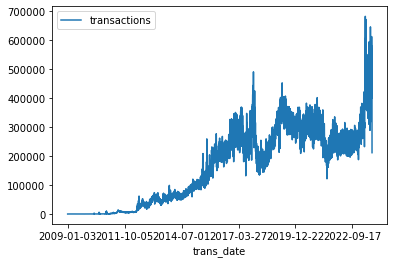

In [55]:
transactions_by_date.set_index('trans_date').plot()

# JOINING DATA

Introduction

You have the tools to obtain data from a single table in whatever format you want it. But what if the data you want is spread across multiple tables?

That's where JOIN comes in! JOIN is incredibly important in practical SQL workflows. So let's get started.

Supposing there are two tables:

Table A(pets_table) has

ID  |   Name   |  Animal
1      Cad       Dog
2      Rin       Cat
3      Beri      Bat
4      Shake    Snake

and Table B(Owner table)

ID  |  Name  |  Pet_ID
1     Mabel     1
2     Kald      2
3     Bull      3
4     Kald      4




Fortunately, we don't have to do this by hand to figure out which owner goes with which pet. In the next section, you'll learn how to use JOIN to create a new table combining information from the pets and owners tables.

JOIN

Using JOIN, we can write a query to create a table with just two columns: the name of the pet and the name of the owner.

query = """

SELECT p.Name AS Pet_Name, o.Name AS Owner_Name FROM `bigquery-public-data.pet_records.pets` AS p INNER JOIN `bigquery-public-data.pet_records.owners' AS o ON p.ID=o.Pet_ID;
"""


Example: How many files are covered by each type of software license?

GitHub is the most popular place to collaborate on software projects. A GitHub repository (or repo) is a collection of files associated with a specific project.

Most repos on GitHub are shared under a specific legal license, which determines the legal restrictions on how they are used. For our example, we're going to look at how many different files have been released under each license.

We'll work with two tables in the database. The first table is the licenses table, which provides the name of each GitHub repo (in the repo_name column) and its corresponding license. Here's a view of the first five rows.


In [56]:
from google.cloud import bigquery

# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "github_repos" dataset
dataset_ref = client.dataset("github_repos", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "licenses" table
licenses_ref = dataset_ref.table("licenses")

# API request - fetch the table
licenses_table = client.get_table(licenses_ref)

# Preview the first five lines of the "licenses" table
client.list_rows(licenses_table, max_results=5).to_dataframe()


,repo_name,license
0,autarch/Dist-Zilla-Plugin-Test-TidyAll,artistic-2.0
1,thundergnat/Prime-Factor,artistic-2.0
2,kusha-b-k/Turabian_Engin_Fan,artistic-2.0
3,onlinepremiumoutlet/onlinepremiumoutlet.github.io,artistic-2.0
4,huangyuanlove/LiaoBa_Service,artistic-2.0




The second table is the sample_files table, which provides, among other information, the GitHub repo that each file belongs to (in the repo_name column). The first several rows of this table are printed below.


In [57]:
# Construct a reference to the "sample_files" table
files_ref = dataset_ref.table("sample_files")

# API request - fetch the table
files_table = client.get_table(files_ref)

# Preview the first five lines of the "sample_files" table
client.list_rows(files_table, max_results=5).to_dataframe()



,repo_name,ref,path,mode,id,symlink_target
0,EOL/eol,refs/heads/master,generate/vendor/railties,40960,0338c33fb3fda57db9e812ac7de969317cad4959,/usr/share/rails-ruby1.8/railties
1,np/ling,refs/heads/master,tests/success/merger_seq_inferred.t/merger_seq...,40960,dd4bb3d5ecabe5044d3fa5a36e0a9bf7ca878209,../../../fixtures/all/merger_seq_inferred.ll
2,np/ling,refs/heads/master,fixtures/sequence/lettype.ll,40960,8fdf536def2633116d65b92b3b9257bcf06e3e45,../all/lettype.ll
3,np/ling,refs/heads/master,fixtures/failure/wrong_order_seq3.ll,40960,c2509ae1196c4bb79d7e60a3d679488ca4a753e9,../all/wrong_order_seq3.ll
4,np/ling,refs/heads/master,issues/sequence/keep.t,40960,5721de3488fb32745dfc11ec482e5dd0331fecaf,../keep.t


Next, we write a query that uses information in both tables to determine how many files are released in each license.

In [59]:
# Query to determine the number of files per license, sorted by number of files
query = """
        SELECT L.license, COUNT(1) AS number_of_files
        FROM `bigquery-public-data.github_repos.sample_files` AS sf
        INNER JOIN `bigquery-public-data.github_repos.licenses` AS L 
            ON sf.repo_name = L.repo_name
        GROUP BY L.license
        ORDER BY number_of_files DESC
        """

In [60]:
# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 10 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
file_count_by_license = query_job.to_dataframe()


We'll begin with the JOIN (highlighted in blue above). This specifies the sources of data and how to join them. We use ON to specify that we combine the tables by matching the values in the repo_name columns in the tables.

Next, we'll talk about SELECT and GROUP BY (highlighted in yellow). The GROUP BY breaks the data into a different group for each license, before we COUNT the number of rows in the sample_files table that corresponds to each license. (Remember that you can count the number of rows with COUNT(1).)

Finally, the ORDER BY (highlighted in purple) sorts the results so that licenses with more files appear first.

It was a big query, but it gave us a nice table summarizing how many files have been committed under each license: